In [1]:
import pandas as pd
from src.models.model1.recommend import build_detected_group_profile
from src.data.build_features_3 import build_group_interaction_rate
from src.models.model1.model_preprocess import build_dataset_3
from sklearn.preprocessing import StandardScaler

In [2]:
test_data = pd.read_pickle ('data/test/m06c_1_1_test_data.pkl')
group_features = pd.read_pickle ('data/processed/model1/processed_group_features.pkl')
processed_technique_features = pd.read_pickle ('data/processed/model1/processed_technnique_features.pkl')

train_labels =pd.read_pickle ('data/processed/model1/processed_train_labels.pkl')
y_cleaned = pd.read_pickle ('data/interim/y_cleaned.pkl')


In [3]:
'T1090' in train_labels[train_labels['label'] == 1]['technique_ID'].unique()

True

In [4]:
test_data

,group_ID,detected_techniques,candidate_techniques,true_subsequent_techniques
0,aa22-277a,[T1078],"[T1548, T1548.002, T1134.005, T1531, T1087, T1...","[T1047, T1059, T1059.001, T1059.003, T1059.006..."
1,aa22-277a,"[T1078, T1047]","[T1548, T1548.002, T1134.005, T1531, T1087, T1...","[T1059, T1059.001, T1059.003, T1059.006, T1129..."
2,aa22-277a,"[T1078, T1047, T1059]","[T1548, T1548.002, T1134.005, T1531, T1087, T1...","[T1059.001, T1059.003, T1059.006, T1129, T1569..."
3,aa22-277a,"[T1078, T1047, T1059, T1059.001]","[T1548, T1548.002, T1134.005, T1531, T1087, T1...","[T1059.003, T1059.006, T1129, T1569, T1078, T1..."
4,aa22-277a,"[T1078, T1047, T1059, T1059.001, T1059.003]","[T1548, T1548.002, T1134.005, T1531, T1087, T1...","[T1059.006, T1129, T1569, T1078, T1543, T1078,..."
5,aa22-277a,"[T1078, T1047, T1059, T1059.001, T1059.003, T1...","[T1548, T1548.002, T1134.005, T1531, T1087, T1...","[T1129, T1569, T1078, T1543, T1078, T1036.005,..."
6,aa22-277a,"[T1078, T1047, T1059, T1059.001, T1059.003, T1...","[T1548, T1548.002, T1548.004, T1548.001, T1548...","[T1569, T1078, T1543, T1078, T1036.005, T1070,..."
7,aa22-277a,"[T1078, T1047, T1059, T1059.001, T1059.003, T1...","[T1548, T1548.002, T1548.004, T1548.001, T1548...","[T1078, T1543, T1078, T1036.005, T1070, T1070...."
8,aa22-277a,"[T1078, T1047, T1059, T1059.001, T1059.003, T1...","[T1548, T1548.002, T1548.004, T1548.001, T1548...","[T1543, T1078, T1036.005, T1070, T1070.004, T1..."
9,aa22-277a,"[T1078, T1047, T1059, T1059.001, T1059.003, T1...","[T1548, T1548.002, T1548.004, T1548.001, T1548...","[T1078, T1036.005, T1070, T1070.004, T1078, T1..."


In [5]:
detected_techniques = ['T1078', 'T1047', 'T1059', 'T1059.001', 'T1059.003', 'T1059.001', 'T1059.003']
settings = {
    'interaction' : 'min'
}

res = build_detected_group_profile (processed_group_features= group_features,
                                    processed_technique_features = processed_technique_features ,
                                    detected_techniques= detected_techniques[0:6], threshold=5,train_labels= train_labels,group_id='yah', settings=settings)
res

,group_ID,input_group_software_id,input_group_tactics,input_group_description,input_group_interaction_rate
0,yah,"[s0234, s0023, s0334, s0695, s0363, s0434, s04...","[execution, execution, execution, defense_evas...","[-0.4318556785583496, -0.12413875013589859, -0...",-1.342618


In [6]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.data import Dataset
from src.models.model1.predict import get_metrics
model = keras.models.load_model ('trained_models/model1/m06c_1_1')
cv_dataset = Dataset.load ('data/processed/model1/cv_dataset')
metrics = get_metrics (model, cv_dataset)
prediction_threshold = metrics['best_threshold']

204/204 [==============================] - 7s 31ms/step


In [7]:
metrics

{'best_threshold': 0.5583423,
 'best_f1_score': 0.4459833794525246,
 'auc_pr': 0.4069153}

In [8]:
test_data_with_preds = test_data.copy()
test_data_with_preds['predicted_techniques'] = None
test_data_with_preds['accuracy'] = None
test_data_with_preds['precision'] = None
test_data_with_preds['recall'] = None
group_profile_update_threshold = 3
settings = {'interaction' : 'min'}
prediction_threshold = metrics['best_threshold'] * .7
for index, row in test_data_with_preds.iterrows():
    detected_techniques = row['detected_techniques']
    candidate_techniques = row['candidate_techniques']
    group_ID = row['group_ID']
    candidate_technique_features = processed_technique_features[processed_technique_features['technique_ID'].isin(candidate_techniques)]
    detected_group_profile = build_detected_group_profile (processed_group_features= group_features,
                                    processed_technique_features = processed_technique_features ,
                                    detected_techniques= detected_techniques[0:6], threshold=group_profile_update_threshold,train_labels= train_labels,group_id= group_ID, settings=settings)
    
    aligned_group_profile = pd.concat ([detected_group_profile] * len(candidate_techniques), ignore_index= True)

    blank_labels = pd.DataFrame({'label': [-1]* len(candidate_techniques)})

    test_dataset = build_dataset_3 (X_group_df= aligned_group_profile, X_technique_df= candidate_technique_features, y_df= blank_labels,
                                    selected_ragged_group_features = [f for f in detected_group_profile.columns if f not in ('group_ID', 'input_group_interaction_rate', 'input_group_description')],
                                    selected_ragged_technique_features = [f for f in candidate_technique_features if f not in ('technique_ID', 'input_technique_description', 'input_technique_interaction_rate')])
    test_dataset = test_dataset.batch(32)
    test_dataset.batch(32)
    results_logit = model.predict(test_dataset,verbose=0)
    results_prob = tf.keras.activations.sigmoid(results_logit)
    results_binary = np.where(results_prob >= prediction_threshold, 1, 0)
    results_binary = results_binary.flatten().tolist()
    results = [technique for binary_val, technique in zip (results_binary, candidate_techniques) if binary_val == 1.0]
    test_data_with_preds.at[index, 'predicted_techniques'] = results
    
    true_values = row['true_subsequent_techniques']
    predicted_values = results
    
    correct_predictions = [1 if val in true_values else 0 for val in predicted_values]
    accuracy = sum(correct_predictions) / len(predicted_values)
    
    true_positives = sum([1 for val in predicted_values if val in true_values])
    false_positives = len(predicted_values) - true_positives

    precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
    recall = true_positives / len(true_values) if len(true_values) > 0 else 0
    # print(f"Accuracy: {accuracy:.4f}", f"Precision: {precision:.4f}",f"Recall: {recall:.4f}")
    test_data_with_preds.at[index,'accuracy'] = accuracy
    test_data_with_preds.at[index,'precision'] = precision
    test_data_with_preds.at[index,'recall'] = recall
    

In [9]:
test_data_with_preds

,group_ID,detected_techniques,candidate_techniques,true_subsequent_techniques,predicted_techniques,accuracy,precision,recall
0,aa22-277a,[T1078],"[T1548, T1548.002, T1134.005, T1531, T1087, T1...","[T1047, T1059, T1059.001, T1059.003, T1059.006...","[T1087.002, T1087.001, T1071.004, T1071.001, T...",0.208791,0.208791,0.558824
1,aa22-277a,"[T1078, T1047]","[T1548, T1548.002, T1134.005, T1531, T1087, T1...","[T1059, T1059.001, T1059.003, T1059.006, T1129...","[T1087.002, T1087.001, T1071.004, T1071.001, T...",0.218391,0.218391,0.575758
2,aa22-277a,"[T1078, T1047, T1059]","[T1548, T1548.002, T1134.005, T1531, T1087, T1...","[T1059.001, T1059.003, T1059.006, T1129, T1569...","[T1087.002, T1087.001, T1071.001, T1560, T1560...",0.230769,0.230769,0.5625
3,aa22-277a,"[T1078, T1047, T1059, T1059.001]","[T1548, T1548.002, T1134.005, T1531, T1087, T1...","[T1059.003, T1059.006, T1129, T1569, T1078, T1...","[T1087.002, T1087.001, T1071.001, T1560, T1560...",0.223684,0.223684,0.548387
4,aa22-277a,"[T1078, T1047, T1059, T1059.001, T1059.003]","[T1548, T1548.002, T1134.005, T1531, T1087, T1...","[T1059.006, T1129, T1569, T1078, T1543, T1078,...","[T1087.002, T1087.001, T1071.001, T1560, T1560...",0.210526,0.210526,0.533333
5,aa22-277a,"[T1078, T1047, T1059, T1059.001, T1059.003, T1...","[T1548, T1548.002, T1134.005, T1531, T1087, T1...","[T1129, T1569, T1078, T1543, T1078, T1036.005,...","[T1087.002, T1087.001, T1071.001, T1560, T1560...",0.197368,0.197368,0.517241
6,aa22-277a,"[T1078, T1047, T1059, T1059.001, T1059.003, T1...","[T1548, T1548.002, T1548.004, T1548.001, T1548...","[T1569, T1078, T1543, T1078, T1036.005, T1070,...","[T1087.002, T1087.001, T1071.001, T1560, T1560...",0.2,0.2,0.535714
7,aa22-277a,"[T1078, T1047, T1059, T1059.001, T1059.003, T1...","[T1548, T1548.002, T1548.004, T1548.001, T1548...","[T1078, T1543, T1078, T1036.005, T1070, T1070....","[T1087.002, T1087.001, T1071.001, T1560, T1560...",0.197368,0.197368,0.555556
8,aa22-277a,"[T1078, T1047, T1059, T1059.001, T1059.003, T1...","[T1548, T1548.002, T1548.004, T1548.001, T1548...","[T1543, T1078, T1036.005, T1070, T1070.004, T1...","[T1087.002, T1087.001, T1071.001, T1560, T1560...",0.197368,0.197368,0.576923
9,aa22-277a,"[T1078, T1047, T1059, T1059.001, T1059.003, T1...","[T1548, T1548.002, T1548.004, T1548.001, T1548...","[T1078, T1036.005, T1070, T1070.004, T1078, T1...","[T1087.002, T1087.001, T1071.001, T1560, T1560...",0.241935,0.241935,0.6


In [ ]:
test_data_with_preds.to_csv ('results.csv')

In [35]:
report_name = 'aa22-174a'
df = test_data_with_preds[test_data_with_preds['group_ID'] == report_name]

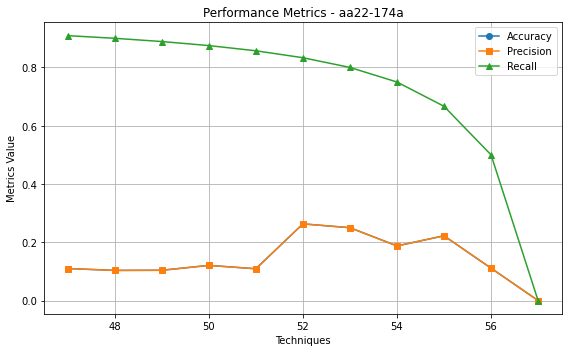

In [36]:
import matplotlib.pyplot as plt

# Assuming metrics_df is your DataFrame containing 'accuracy', 'precision', and 'recall' columns
# Replace this with your actual DataFrame

# Plotting
plt.figure(figsize=(8, 5))  # Set figure size

# Plot each column as a line plot
plt.plot(df['accuracy'], label='Accuracy', marker='o')
plt.plot(df['precision'], label='Precision', marker='s')
plt.plot(df['recall'], label='Recall', marker='^')

# Set labels and title
plt.xlabel('Techniques')
plt.ylabel('Metrics Value')
plt.title('Performance Metrics' +  ' - '  + report_name)

# Show legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
